# 1.0 Purpose
The purpose of this notebook is to use Embedding for a Natural Language Processing (NLP) task with TensorFlow on the imbd_reviews dataset.  Predictions are "1" for a bad review and "0" for  a good review.

# 2.0 Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


## Helper Functions

### decode_review

In [2]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])



### get_training_metrics

In [3]:
def get_training_metrics(history):
  
  # This is needed depending on if you used the pretrained model or you trained it yourself
  if not isinstance(history, pd.core.frame.DataFrame):
    history = history.history
  
  acc = history['binary_accuracy']
  val_acc = history['val_binary_accuracy']

  loss = history['loss']
  val_loss = history['val_loss']

  return acc, val_acc, loss, val_loss

### plot_train_eval

In [4]:
def plot_train_eval(history,name='',parameters='',optimizer_name='',loss='',accuracy_metric='',epochs='',vocab_size='',embedding_dim='',max_length='',trunc_type='',oov_tok=''):
  acc, val_acc, loss_values, val_loss = get_training_metrics(history)

  acc_plot = pd.DataFrame({"training accuracy":acc, "evaluation accuracy":val_acc})
  acc_plot = sns.lineplot(data=acc_plot)
  acc_plot.set_title(f'training vs evaluation accuracy: {name} \n # parameters={parameters} \n optimizer_name={optimizer_name} \n loss={loss} \n accuracy_metric={accuracy_metric} \n epochs={epochs} \n vocab_size={vocab_size} \n embedding_dim={embedding_dim} \n max_length={max_length} \n trunc_type={trunc_type} \n oov_tok={oov_tok}')
  acc_plot.set_xlabel('epoch')
  acc_plot.set_ylabel(accuracy_metric)
  plt.savefig(f'{name} - train_acc_vs_eval_acc.jpg',bbox_inches='tight')
  plt.show()


  print("")

  loss_plot = pd.DataFrame({"training loss":loss_values, "evaluation loss":val_loss})
  loss_plot = sns.lineplot(data=loss_plot)
  loss_plot.set_title(f'training vs evaluation loss: {name} \n # parameters={parameters} \n optimizer_name={optimizer_name}  \n loss={loss} \naccuracy_metric={accuracy_metric} \n epochs={epochs} \n vocab_size={vocab_size} \n embedding_dim={embedding_dim} \n max_length={max_length} \n trunc_type={trunc_type} \n oov_tok={oov_tok}')
  loss_plot.set_xlabel('epoch')
  loss_plot.set_ylabel(loss)
  plt.savefig(f'{name} - train_loss_vs_eval_loss.jpg',bbox_inches='tight')
  plt.show()

### model_picker

In [5]:
def model_picker(vocab_size=100,embedding_dim=16,input_length=100,model_name='model1'):

  if model_name=='model1':
    model = tf.keras.Sequential([
                                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(6,activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model_description=f'Embedding(vocab_size={vocab_size}, \n embedding_dim={embedding_dim}, \n input_length={max_length}), \n Flatten, \n Dense(6,relu), \n Dense(1,sigmoid)'
  elif model_name=='model2':
    model = tf.keras.Sequential([
                                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                tf.keras.layers.GlobalAveragePooling1D(),
                                tf.keras.layers.Dense(6,activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model_description=f'Embedding(vocab_size={vocab_size},embedding_dim={embedding_dim},input_length={max_length}), \n GlobalAveragePooling1D,\n Dense(6,relu), \n Dense(1,sigmoid)'
  elif model_name=='model3':
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size}, \n embedding_dim={embedding_dim}), \n Bidirectional(LSTM(64,return_sequences=True)), \n Bidirectional(LSTM(32)), \n Dense(64,relu), \n Dense(1,sigmoid)'
  elif model_name=='model4':
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size}, \n embedding_dim={embedding_dim}), \n Bidirectional(LSTM(32)), \n Dense(24,relu), \n Dense(1,sigmoid)'
  elif model_name=='model5':
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size},embedding_dim={embedding_dim},input_length={max_length}), \n Bidirectional(LSTM(32)),Dense(6,relu),Dense(1,sigmoid)'
  elif model_name=='model6':
    model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Conv1D(128, 5, activation='relu'),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size},embedding_dim={embedding_dim},input_length={max_length}), \n Conv1D(128,5,activation=relu), \n GlobalAveragePooling1D, \n Dense(6,relu),Dense(1,sigmoid)'
  elif model_name=='model7':
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size},embedding_dim={embedding_dim},input_length={max_length}), \n Bidirectional(GRU(32)),Dense(6,relu),Dense(1,sigmoid)'
  return model,model_description

# 3.0 Import **imbd_reviews**

https://www.tensorflow.org/datasets/catalog/imdb_reviews

In [6]:

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True,download=True)


In [7]:
cols=['filename','model_name','model_description',
      'optimizer',
      'loss',
      'accuracy_metric','epochs','vocab_size','embedding_dim','max_length','trunc_type','oov_tok','final_eval_loss','final_eval_acc']
df_metrics=pd.DataFrame(columns=cols)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc


# 4.1 model1

## Set Embedding/Modeling Parameters

In [8]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model1'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [9]:
train_data, test_data = imdb['train'], imdb['test']

In [10]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [11]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [12]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [13]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [14]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [15]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [16]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [17]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [18]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [19]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [20]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [21]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [22]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [23]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [24]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name='model1')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [27]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4976 - binary_accuracy: 0.7365 - val_loss: 0.3465 - val_binary_accuracy: 0.8481
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2433 - binary_accuracy: 0.9058 - val_loss: 0.3652 - val_binary_accuracy: 0.8405
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0944 - binary_accuracy: 0.9762 - val_loss: 0.4677 - val_binary_accuracy: 0.8222
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0239 - binary_accuracy: 0.9965 - val_loss: 0.5554 - val_binary_accuracy: 0.8181
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0058 - binary_accuracy: 0.9997 - val_loss: 0.5818 - val_binary_accuracy: 0.8270
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0018 - binary_accuracy: 1.0000 - val_loss: 0.6327 - val_binary_accuracy: 0.8287
Epoch 7/10
782/782 [==============================] - 4s 6ms/ste

## Evaluate Model

In [28]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [29]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 1ms/step - loss: 0.7843 - binary_accuracy: 0.8290


In [30]:
final_eval_loss

0.784347653388977

In [31]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

171533

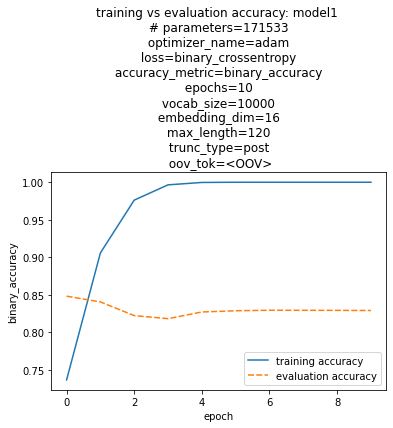

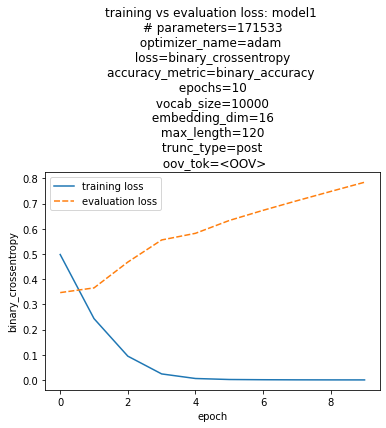

In [32]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [33]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.784348,0.829


In [34]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [35]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [36]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.3522663]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.00077987]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.2 model2

## Set Embedding/Modeling Parameters

In [38]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model2'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [39]:
train_data, test_data = imdb['train'], imdb['test']

In [40]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [41]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [42]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [43]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [44]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [45]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [46]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [47]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [48]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [49]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [50]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [51]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [52]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [53]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [54]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name='model1')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [57]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5067 - binary_accuracy: 0.7306 - val_loss: 0.3519 - val_binary_accuracy: 0.8456
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2459 - binary_accuracy: 0.9051 - val_loss: 0.3703 - val_binary_accuracy: 0.8376
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0984 - binary_accuracy: 0.9747 - val_loss: 0.4418 - val_binary_accuracy: 0.8253
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0250 - binary_accuracy: 0.9968 - val_loss: 0.5255 - val_binary_accuracy: 0.8244
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0058 - binary_accuracy: 0.9997 - val_loss: 0.5897 - val_binary_accuracy: 0.8245
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0020 - binary_accuracy: 1.0000 - val_loss: 0.6390 - val_binary_accuracy: 0.8270
Epoch 7/10
782/782 [==============================] - 5s 6ms/ste

## Evaluate Model

In [58]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [59]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 1ms/step - loss: 0.7952 - binary_accuracy: 0.8282


In [60]:
final_eval_loss

0.7952041625976562

In [61]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

171533

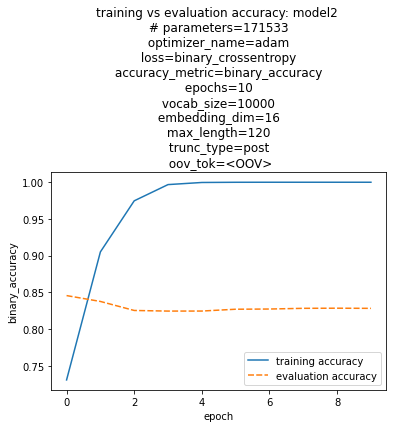

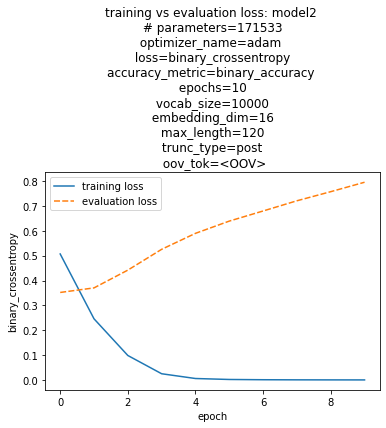

In [62]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [63]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.784348,0.82900
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.795204,0.82816


In [64]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


In [65]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [66]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.92779493]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.01017064]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.3 model3

## Set Embedding/Modeling Parameters

In [68]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model3'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [69]:
train_data, test_data = imdb['train'], imdb['test']

In [70]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [71]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [72]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [73]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [74]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [75]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [76]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [77]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [78]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [79]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [80]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [81]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [82]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [83]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [84]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name='model1')

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [87]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4933 - binary_accuracy: 0.7449 - val_loss: 0.3445 - val_binary_accuracy: 0.8498
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.2392 - binary_accuracy: 0.9078 - val_loss: 0.3722 - val_binary_accuracy: 0.8372
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0910 - binary_accuracy: 0.9776 - val_loss: 0.4589 - val_binary_accuracy: 0.8278
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0233 - binary_accuracy: 0.9970 - val_loss: 0.5263 - val_binary_accuracy: 0.8281
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0056 - binary_accuracy: 0.9995 - val_loss: 0.5945 - val_binary_accuracy: 0.8276
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000 - val_loss: 0.6465 - val_binary_accuracy: 0.8294
Epoch 7/10
782/782 [==============================] - 5s 7ms/ste

## Evaluate Model

In [88]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [89]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 2ms/step - loss: 0.8011 - binary_accuracy: 0.8301


In [90]:
final_eval_loss

0.8010590672492981

In [91]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

171533

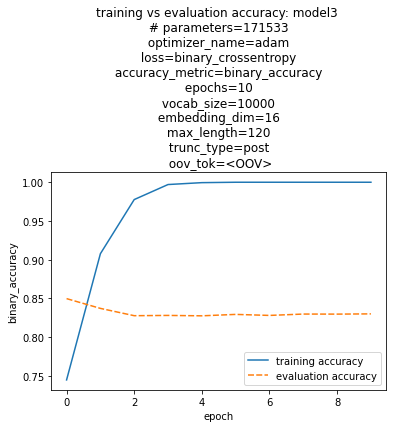

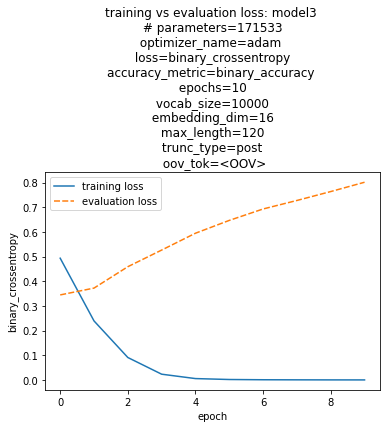

In [92]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [93]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.784348,0.82900
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.795204,0.82816
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.801059,0.83012


In [94]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


In [95]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [96]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.8169106]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.00373334]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.4 model4

## Set Embedding/Modeling Parameters

In [98]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model4'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [99]:
train_data, test_data = imdb['train'], imdb['test']

In [100]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [101]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [102]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [103]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [104]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [105]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [106]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [107]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [108]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [109]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [110]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [111]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [112]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [113]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [114]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name='model1')

In [115]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [117]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.5003 - binary_accuracy: 0.7352 - val_loss: 0.3521 - val_binary_accuracy: 0.8460
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.2374 - binary_accuracy: 0.9075 - val_loss: 0.3737 - val_binary_accuracy: 0.8374
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0870 - binary_accuracy: 0.9781 - val_loss: 0.4510 - val_binary_accuracy: 0.8273
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0210 - binary_accuracy: 0.9972 - val_loss: 0.5309 - val_binary_accuracy: 0.8251
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0049 - binary_accuracy: 0.9997 - val_loss: 0.5892 - val_binary_accuracy: 0.8280
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000 - val_loss: 0.6381 - val_binary_accuracy: 0.8284
Epoch 7/10
782/782 [==============================] - 5s 6ms/ste

## Evaluate Model

In [118]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [119]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 1ms/step - loss: 0.7943 - binary_accuracy: 0.8289


In [120]:
final_eval_loss

0.7943443655967712

In [121]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

171533

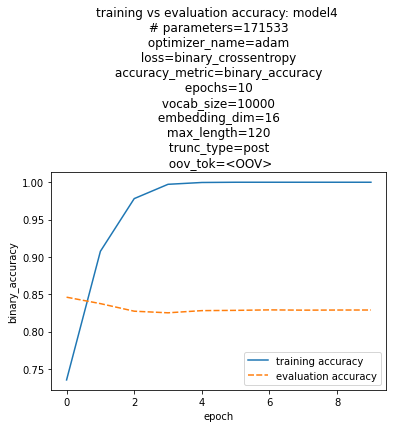

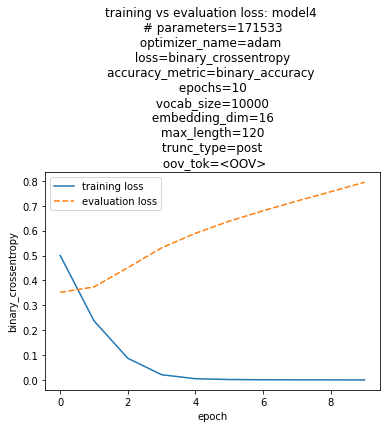

In [122]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [123]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.784348,0.82900
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.795204,0.82816
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.801059,0.83012
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.794344,0.82888


In [124]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


In [125]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [126]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.9148374]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.02149814]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.5 model5

## Set Embedding/Modeling Parameters

In [128]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model5'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [129]:
train_data, test_data = imdb['train'], imdb['test']

In [130]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [131]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [132]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [133]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [134]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [135]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [136]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [137]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [138]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [139]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [140]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [141]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [142]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [143]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [144]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name='model1')

In [145]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [147]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4939 - binary_accuracy: 0.7451 - val_loss: 0.3616 - val_binary_accuracy: 0.8397
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2380 - binary_accuracy: 0.9086 - val_loss: 0.3643 - val_binary_accuracy: 0.8396
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0889 - binary_accuracy: 0.9777 - val_loss: 0.4533 - val_binary_accuracy: 0.8256
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0219 - binary_accuracy: 0.9974 - val_loss: 0.5275 - val_binary_accuracy: 0.8273
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0060 - binary_accuracy: 0.9995 - val_loss: 0.5919 - val_binary_accuracy: 0.8253
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0018 - binary_accuracy: 1.0000 - val_loss: 0.6431 - val_binary_accuracy: 0.8268
Epoch 7/10
782/782 [==============================] - 5s 6ms/ste

## Evaluate Model

In [148]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [149]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 2ms/step - loss: 0.7969 - binary_accuracy: 0.8287


In [150]:
final_eval_loss

0.796941339969635

In [151]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

171533

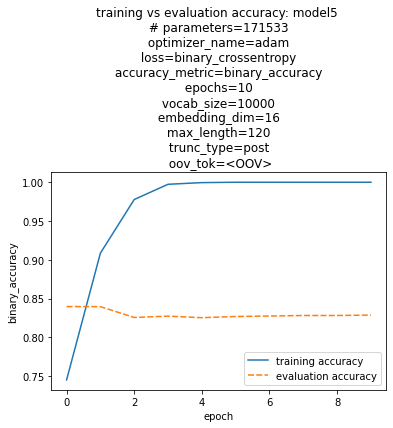

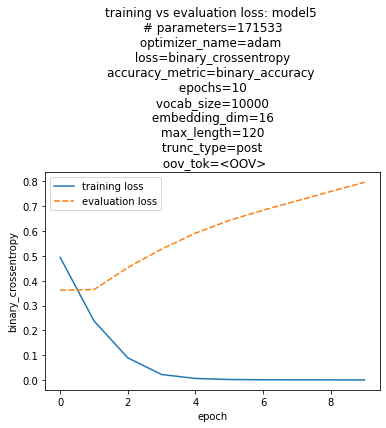

In [152]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [153]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.784348,0.82900
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.795204,0.82816
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.801059,0.83012
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.794344,0.82888
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.796941,0.82872


In [154]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


In [155]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [156]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [157]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.9428507]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.01165771]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.6 model6

## Set Embedding/Modeling Parameters

In [158]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model6'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [159]:
train_data, test_data = imdb['train'], imdb['test']

In [160]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [161]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [162]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [163]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [164]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [165]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [166]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [167]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [168]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [169]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [170]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [171]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [172]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [173]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [174]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name='model1')

In [175]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 11526     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [176]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [177]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4841 - binary_accuracy: 0.7538 - val_loss: 0.3451 - val_binary_accuracy: 0.8491
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2395 - binary_accuracy: 0.9070 - val_loss: 0.3647 - val_binary_accuracy: 0.8398
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0896 - binary_accuracy: 0.9775 - val_loss: 0.4573 - val_binary_accuracy: 0.8259
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0217 - binary_accuracy: 0.9974 - val_loss: 0.5443 - val_binary_accuracy: 0.8216
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0054 - binary_accuracy: 0.9997 - val_loss: 0.6007 - val_binary_accuracy: 0.8258
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0017 - binary_accuracy: 1.0000 - val_loss: 0.6459 - val_binary_accuracy: 0.8273
Epoch 7/10
782/782 [==============================] - 5s 6ms/ste

## Evaluate Model

In [178]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [179]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 1ms/step - loss: 0.8016 - binary_accuracy: 0.8270


In [180]:
final_eval_loss

0.801609456539154

In [181]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

171533

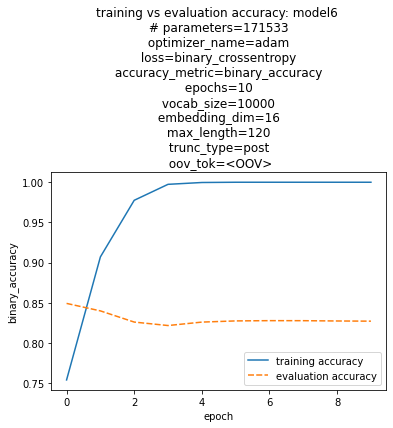

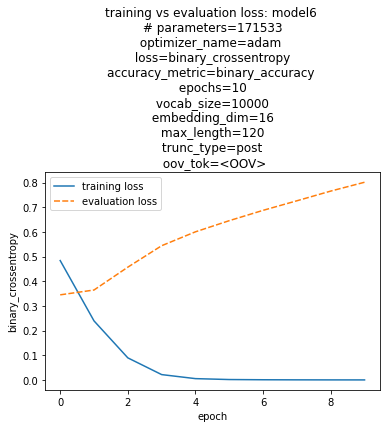

In [182]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [183]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.784348,0.82900
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.795204,0.82816
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.801059,0.83012
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.794344,0.82888
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.796941,0.82872
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.801609,0.82700


In [184]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


In [185]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [186]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [187]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.88048345]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.00842878]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.7 model7

## Set Embedding/Modeling Parameters

In [188]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model7'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [189]:
train_data, test_data = imdb['train'], imdb['test']

In [190]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [191]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [192]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [193]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [194]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [195]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [196]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [197]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [198]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [199]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [200]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [201]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [202]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [203]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [204]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name='model1')

In [205]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 11526     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [206]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [207]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4976 - binary_accuracy: 0.7387 - val_loss: 0.3632 - val_binary_accuracy: 0.8390
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2348 - binary_accuracy: 0.9099 - val_loss: 0.3689 - val_binary_accuracy: 0.8398
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0839 - binary_accuracy: 0.9784 - val_loss: 0.4561 - val_binary_accuracy: 0.8260
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0187 - binary_accuracy: 0.9980 - val_loss: 0.5246 - val_binary_accuracy: 0.8271
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0046 - binary_accuracy: 0.9997 - val_loss: 0.5863 - val_binary_accuracy: 0.8276
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 0.6328 - val_binary_accuracy: 0.8283
Epoch 7/10
782/782 [==============================] - 4s 5ms/ste

## Evaluate Model

In [208]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [209]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 1ms/step - loss: 0.7825 - binary_accuracy: 0.8284


In [210]:
final_eval_loss

0.7824556827545166

In [211]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

171533

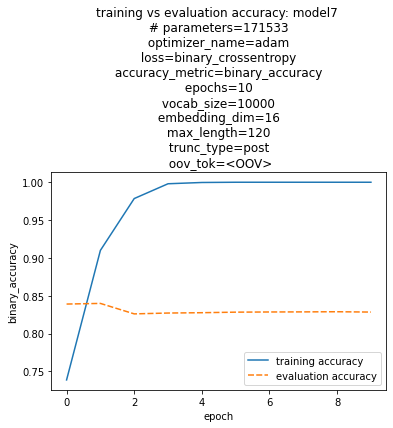

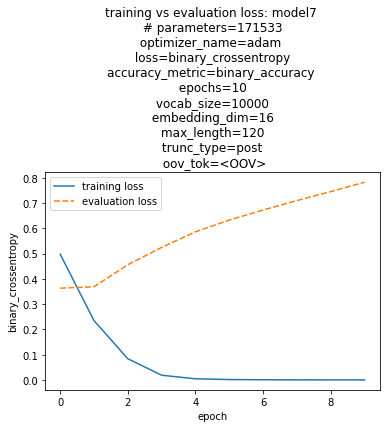

In [212]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [213]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.784348,0.82900
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.795204,0.82816
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.801059,0.83012
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.794344,0.82888
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.796941,0.82872
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.801609,0.82700
6,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model7,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.782456,0.82840


In [214]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


In [215]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [216]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [217]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.6334901]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.00273472]]
This makes sense since it is a value close to 0, meaning a bad review


# 5.0 Export Models

In [218]:
!zip -r /content/model1.zip /content/model1

updating: content/model1/ (stored 0%)
updating: content/model1/assets/ (stored 0%)
updating: content/model1/saved_model.pb (deflated 87%)
updating: content/model1/keras_metadata.pb (deflated 85%)
updating: content/model1/variables/ (stored 0%)
updating: content/model1/variables/variables.index (deflated 61%)
updating: content/model1/variables/variables.data-00000-of-00001 (deflated 7%)


In [219]:
!zip -r /content/model2.zip /content/model2

updating: content/model2/ (stored 0%)
updating: content/model2/assets/ (stored 0%)
updating: content/model2/saved_model.pb (deflated 87%)
updating: content/model2/keras_metadata.pb (deflated 85%)
updating: content/model2/variables/ (stored 0%)
updating: content/model2/variables/variables.index (deflated 61%)
updating: content/model2/variables/variables.data-00000-of-00001 (deflated 7%)


In [220]:
!zip -r /content/model3.zip /content/model3

updating: content/model3/ (stored 0%)
updating: content/model3/assets/ (stored 0%)
updating: content/model3/saved_model.pb (deflated 87%)
updating: content/model3/keras_metadata.pb (deflated 86%)
updating: content/model3/variables/ (stored 0%)
updating: content/model3/variables/variables.index (deflated 61%)
updating: content/model3/variables/variables.data-00000-of-00001 (deflated 7%)


In [221]:
!zip -r /content/model4.zip /content/model4

updating: content/model4/ (stored 0%)
updating: content/model4/assets/ (stored 0%)
updating: content/model4/saved_model.pb (deflated 87%)
updating: content/model4/keras_metadata.pb (deflated 85%)
updating: content/model4/variables/ (stored 0%)
updating: content/model4/variables/variables.index (deflated 61%)
updating: content/model4/variables/variables.data-00000-of-00001 (deflated 7%)


In [222]:
!zip -r /content/model5.zip /content/model5

  adding: content/model5/ (stored 0%)
  adding: content/model5/assets/ (stored 0%)
  adding: content/model5/saved_model.pb (deflated 87%)
  adding: content/model5/keras_metadata.pb (deflated 85%)
  adding: content/model5/variables/ (stored 0%)
  adding: content/model5/variables/variables.index (deflated 61%)
  adding: content/model5/variables/variables.data-00000-of-00001 (deflated 7%)


In [223]:
!zip -r /content/model6.zip /content/model6

  adding: content/model6/ (stored 0%)
  adding: content/model6/assets/ (stored 0%)
  adding: content/model6/saved_model.pb (deflated 87%)
  adding: content/model6/keras_metadata.pb (deflated 85%)
  adding: content/model6/variables/ (stored 0%)
  adding: content/model6/variables/variables.index (deflated 61%)
  adding: content/model6/variables/variables.data-00000-of-00001 (deflated 7%)


In [224]:
!zip -r /content/model7.zip /content/model7

  adding: content/model7/ (stored 0%)
  adding: content/model7/assets/ (stored 0%)
  adding: content/model7/saved_model.pb (deflated 87%)
  adding: content/model7/keras_metadata.pb (deflated 85%)
  adding: content/model7/variables/ (stored 0%)
  adding: content/model7/variables/variables.index (deflated 61%)
  adding: content/model7/variables/variables.data-00000-of-00001 (deflated 7%)


# Install **rclone**
This is so you can save your checkpoints weights to your actual google drive for restoration.

In [225]:
! curl https://rclone.org/install.sh | sudo bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4491  100  4491    0     0   4935      0 --:--:-- --:--:-- --:--:--  4929
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    15  100    15    0     0     16      0 --:--:-- --:--:-- --:--:--    16

The latest version of rclone rclone v1.55.1 is already installed.



You want to create a remote configuration with rclone.  Use the default recommendations.

In [226]:
!rclone config

Current remotes:

Name                 Type
====                 ====
remote               drive

e) Edit existing remote
n) New remote
d) Delete remote
r) Rename remote
c) Copy remote
s) Set configuration password
q) Quit config
e/n/d/r/c/s/q> q


# Copy Content to **Google Drive** with **rclone**
Try to copy exisiting weights to a future directory to ensure rclone is configured right

This line tests the ability to copy known weights to a directory on you **Google Drive** with **rclone**

In [227]:
!rclone copy "/content/"  remote:"/Colab_Notebooks/GitHub/TensorFlow_Examples/Basics/Wk6/content"